CMPINF 0010 Final Project: What is the Best Neighborhood in Pittsburgh?

Introduction: For this project, we were given the task to use our own created metrics based on data found on the WRPDC to determine the best neighborhood in Pittsburgh. The first question that comes to mind is, what determines if a certain neighborhood is the best, or the worst? In my opinion, what determines if a neighborhood is better than another is how safe the neighborhood is. Safety is a top priority in life because no one wants to be in danger during their day to day activities. If a couple has children they are more likely to want to move to a safer neighborhood. Safer neighborhoods run less of a risk of robbery, injury, etc. For this reason, I will be measuring the safety levels of local neighborhoods based on the metric below. 

Metric: The metric I will be using to determine the safety of a neighborhood is based on arrest data. A neighborhood with a low number of arrests will be considered safer than one with a high number of arrests. The dataset I will be analyzing for this is the Pittsburgh Police Arrest Dataset. 

The city of Pittsburgh is relatively large, so it comes at no surprise that the arrest dataset is extremelty large. A large amount of data is great but we want to cut some of the fluff out of the data so we can get good and proper data for our metric. 

First we need the basic imports for python and pandas. 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

Our next step is to import our data set so we can begin to analyze it. Once we import the data set we can begin to filter some of the more important data away from the less important data. 

In [4]:
columns = ['INCIDENTNEIGHBORHOOD', 'OFFENSES', 'ARRESTTIME'] #This tells the program what columns I want to use

par = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv", usecols=columns) #This line reads the data from the csv but only the columns I defined above
par.head()

,ARRESTTIME,OFFENSES,INCIDENTNEIGHBORHOOD
0,2016-08-24T12:20:00,3929 Retail Theft.,Bloomfield
1,2016-08-03T14:55:00,13(a)(16) Possession of Controlled Substance,Outside City
2,2016-08-03T16:45:00,3929 Retail Theft.,Westwood
3,2016-08-05T02:36:00,5503 Disorderly Conduct. / 5505 Public Drunken...,East Allegheny
4,2016-08-06T02:00:00,2702 Aggravated Assault. / 2705 Recklessy Enda...,Crafton Heights


To filter this data I used the "usecols" command to only use the columns I defined above. This way I am able to focus on the exact data I want to use, which is type of offense and the neighborhood where the offense took place. 

The first thing I wanted to analyze was the most frequent types of crimea that were being commited in the city of Pittsburgh. To do this I used the "value_counts" command. Below I chose to show the top 10 most frequent crimes committed. 

In [5]:
par.OFFENSES.value_counts().iloc[:10]

2701 Simple Assault.                                                                          3430
9015 Failure To Appear/Arrest on Attachment Order                                             2717
9501 Bench Warrant                                                                            2650
13(a)(31) Marijuana: Possession Small Amount                                                  1077
13(a)(32) Paraphernalia - Use or Possession                                                   1050
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession     865
2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury                         834
13(a)(16) Possession of Controlled Substance                                                   702
3929 Retail Theft.                                                                             627
2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck      606
Name: OFFE

As you can see, it seems as though Simple Assault is the clear winner with over 3000 counts. There are more specific types of simple assault but to keep it simple we will count them as seperate offenses. 

This data is great but doesnt look good, let's change it into a different format like a bar graph. 

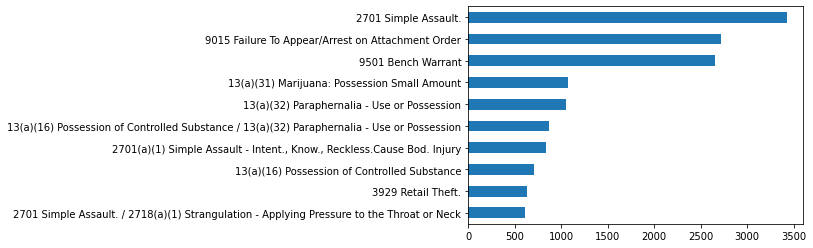

In [6]:
par.OFFENSES.value_counts().iloc[:10].sort_values().plot(kind= "barh")

This data is now much nicer to look at and is more effective at showing that Simple assualt is the clear highest count offense in the city of Pittsburgh. 

Now I would like to pivot into looking at some of the neighborhood data in reference to the crimes mentioned above.

In [7]:
par.INCIDENTNEIGHBORHOOD.value_counts().iloc[:10]

Central Business District    3161
South Side Flats             2669
Carrick                      1844
East Allegheny               1709
Homewood South               1680
Homewood North               1537
East Liberty                 1434
Marshall-Shadeland           1193
Bluff                        1154
Mount Washington             1121
Name: INCIDENTNEIGHBORHOOD, dtype: int64

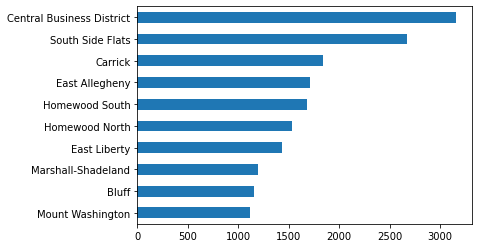

In [8]:
par.INCIDENTNEIGHBORHOOD.value_counts().iloc[:10].sort_values().plot(kind= "barh")

Above we can see the data for the top 10 neighborhoods with the most number of offenses. I once again limited it to the top 10 to keep it simpler and cleaner to analyze. With a quick look we can see that the Central Business District has the most amount of incidents followed closely by South Side Flats.
 
Isn't the point of this analysis to find the safest neighborhood. Well lets find out. 

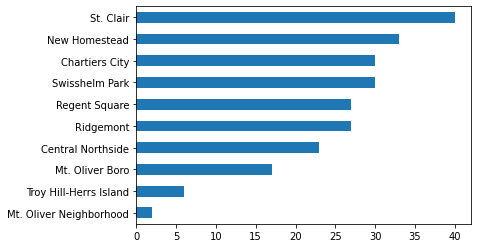

In [9]:
par.INCIDENTNEIGHBORHOOD.value_counts().iloc[-10:].sort_values().plot(kind= "barh")

With a simple switch of a number in iloc we now have the top 10 neighborhoods with the lowest number of offenses. Here Mt. Oliver is the clear winner with a low number of 2 offenses. 

Is just the number of offenses enough to determine a clear winner of safest neighborhood? In my opinion it is not that simple. There is a reason for the earlier analysis of what crimes were the most committed. Other than pure interest factor, this data can be manipulated to help determine higher or lower risk factor. 

For an example, lets isolate a specific type of offense. Lets use simple assault as an example, because it is generally a big threat to safety. 

In [10]:
assault = par[par.OFFENSES.str.contains("Simple Assault", na=False)]
assault.sample(10)

,ARRESTTIME,OFFENSES,INCIDENTNEIGHBORHOOD
6204,2017-03-05T11:05:00,2701 Simple Assault.,Elliott
31064,2019-05-20T12:20:00,2701 Simple Assault. / 2718(a)(1) Strangulatio...,South Oakland
38248,2020-01-13T00:05:00,2701 Simple Assault. / 2718(a)(1) Strangulatio...,Crawford-Roberts
49570,2021-07-06T21:25:00,2701 Simple Assault. / 5505 Public Drunkenness...,Lincoln Place
25225,2018-10-15T19:29:00,2701 Simple Assault. / 13(a)(31) Marijuana: Po...,Mount Washington
4375,2017-01-02T19:53:00,903 Criminal Conspiracy. / 2701 Simple Assault...,Spring Garden
17013,2018-01-27T16:20:00,4304(a)(1) Endangering Welfare of Children. / ...,Central Business District
35835,2019-10-16T17:58:00,2701 Simple Assault. / 3701 Robbery.,Lincoln Place
4105,2016-12-24T20:38:00,2701 Simple Assault.,Central Business District
32678,2019-07-15T09:30:00,2706 Terroristic Threats. / 3502 Burglary. / 2...,Spring Hill-City View


Above is a random sample of 10 cases that contain the words "Simple Assault" to give you an idea of what this code can do. 

Now we can apply the idea we used earlier to find total offenses and limit it to just simple assault.

In [11]:
assault.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending = False)

INCIDENTNEIGHBORHOOD
Carrick                      482
Central Business District    457
South Side Flats             442
Marshall-Shadeland           334
Homewood North               334
                            ... 
Outside State                  4
Regent Square                  2
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Length: 97, dtype: int64

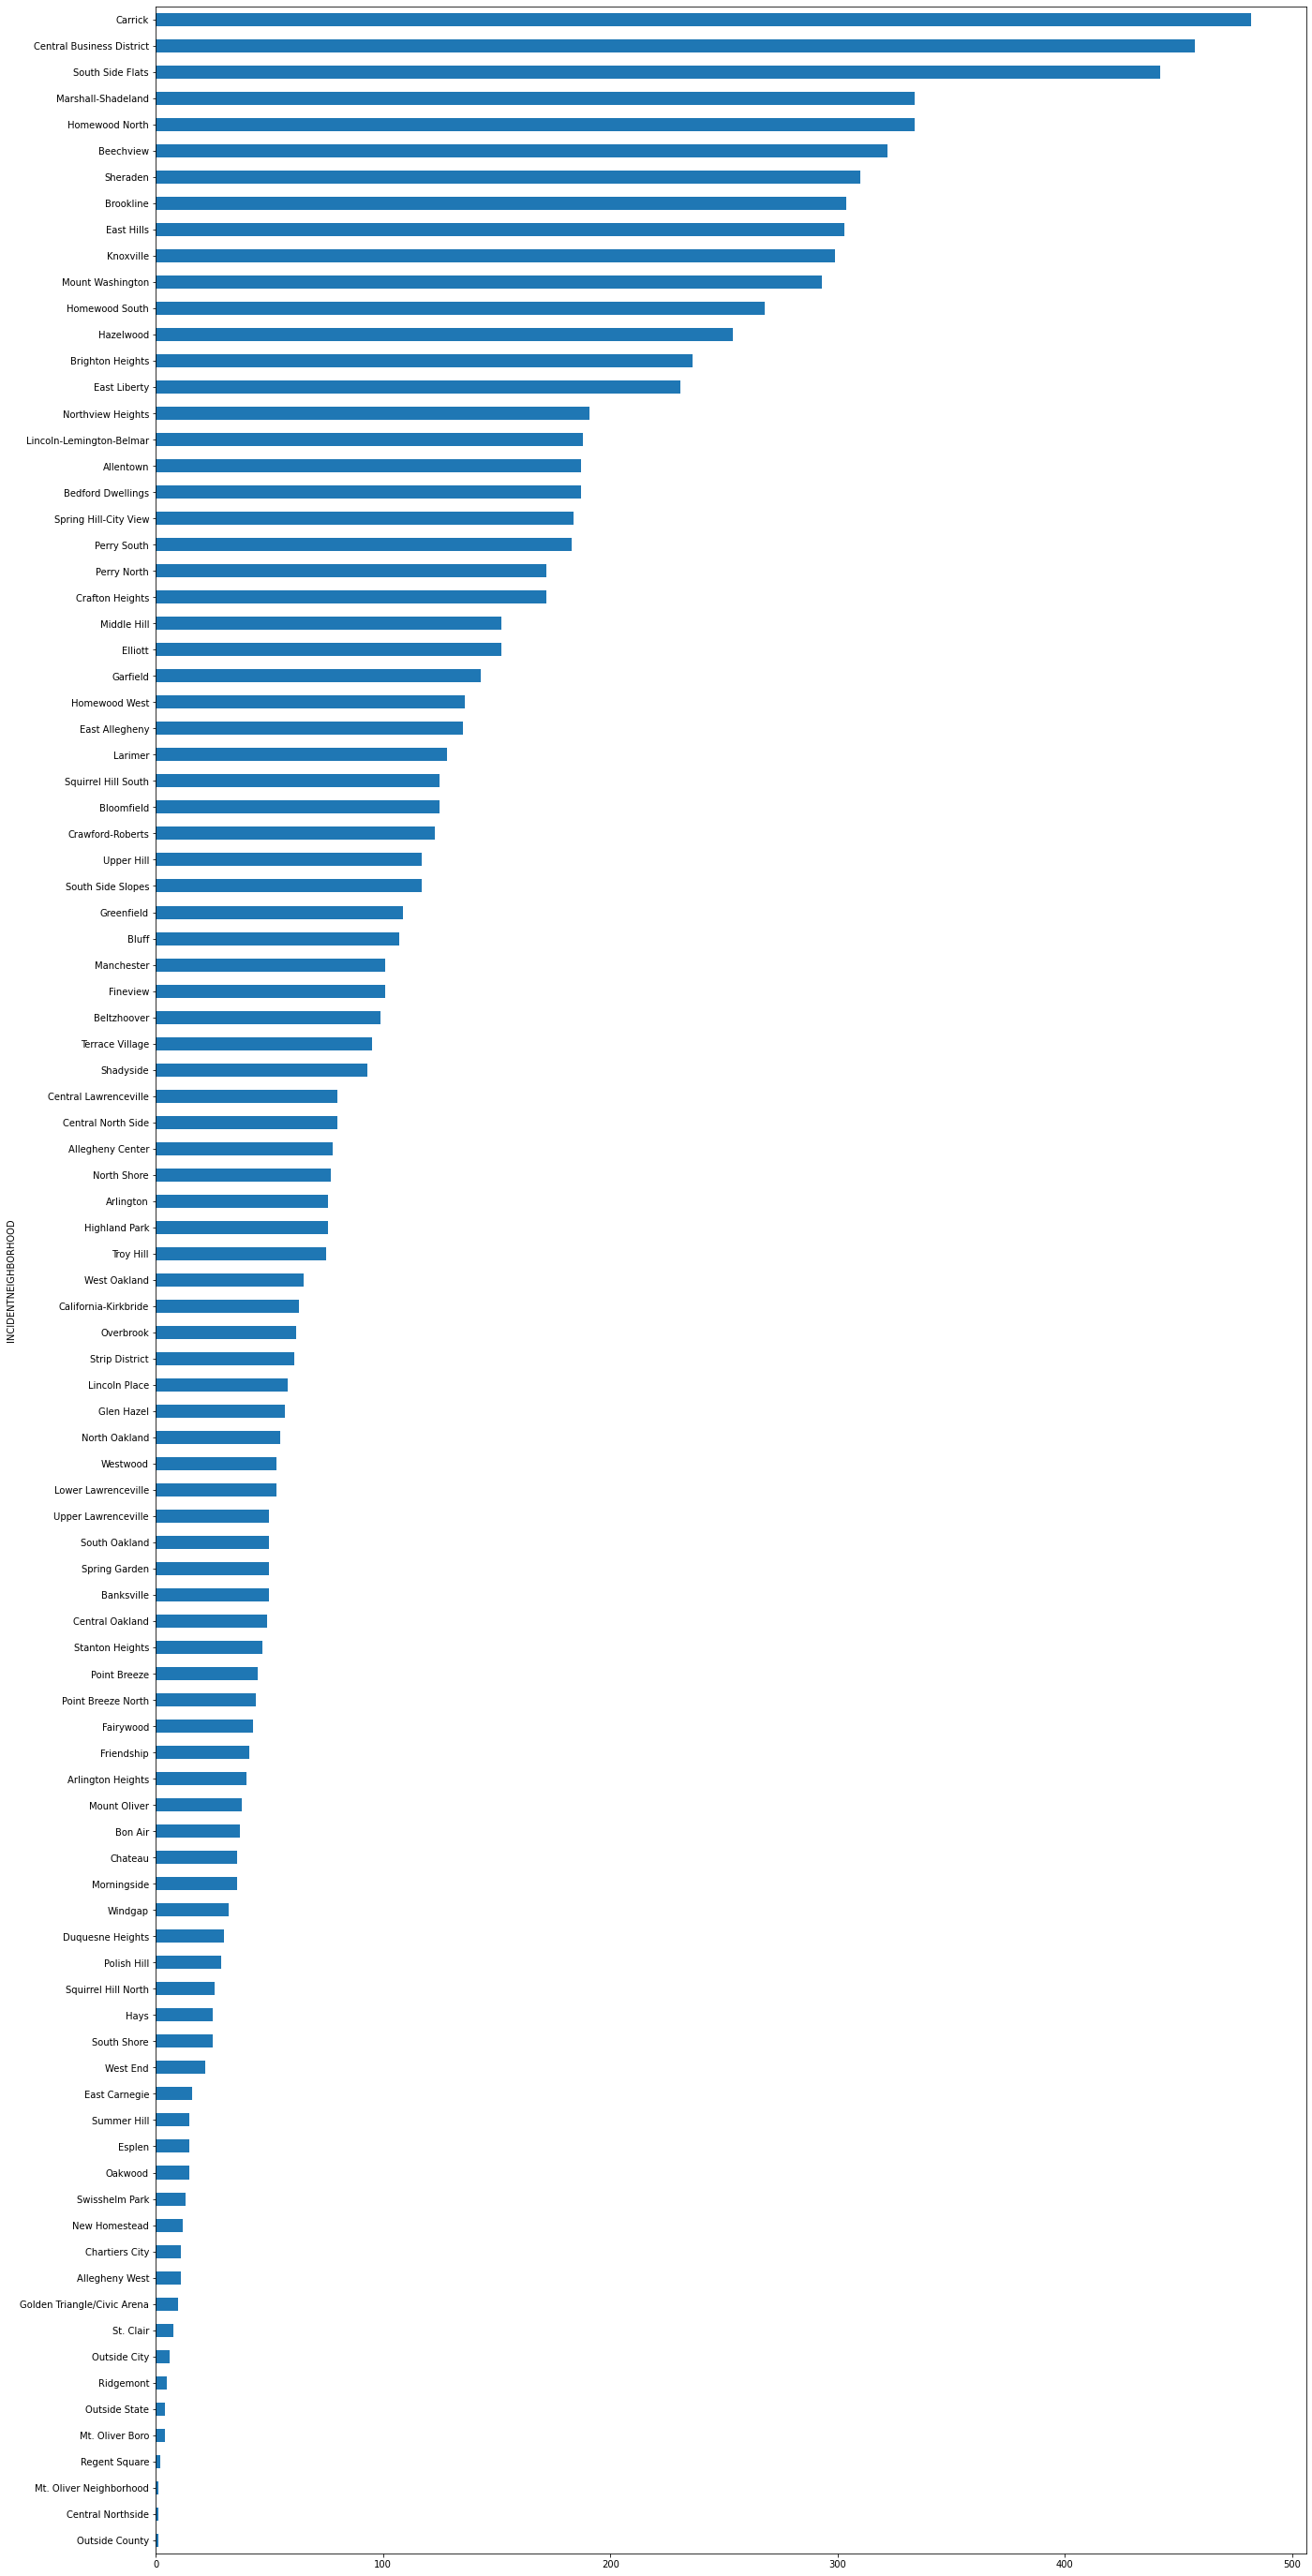

In [12]:
a1 = assault.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending = False).head(150).sort_values()
a1.plot.barh(figsize = (22,50))

Above we can see a graph of all the simple assault cases in all of the nieghborhoods of Pittsburgh. 

Conclusion

In conclusion, after analyzing a good chunk of police report data I can safely say that based on my metric, Mt. Oliver is the safest neighborhood in the city of Pittsburgh. Now this obviously comes with a couple of issues. First and foremost is population. While I would have loved to find the population of all these neighborhoods, I just did not have the time, so therefore I have to work directly with the metric. Second, ever crime is a bit different on the scale of danger. Some neighborhoods could be deemed dafer even with a larger net amount of crimes simply becuase the crimes committed were less of a danger to the public. But once again with time against me, I could not look into that data far enough. While this is unfortunate, it is still interesting to look at the total number of offenses in each neighborhood and which ones are the least and most dangerous. With a couple tweaks in the code, I could easily find the number of a bunch of other offenses to see which ones are the most popular in certain areas. But, I will leave that analysis for another time. So therefore, based strictly off my metric, Mt. Oliver is the safest Neighborhood in Pittsburgh. 